# Project Stage 2: Machine Learning Models
## Author: Karan Goda
### Individual Project
#### Analysis on Kickstarter with Pandas

Contents:
1. Data Processing
2. Data Exploration
3. Confidence Intervals
4. Modelling
5. Evaluation Models Q3 (Includes hypothesis of all models)

Kickstarter is a global community that was founded in April 2009. Kickstarter allows people to invest in projects that
they believe in, which are also created by other people who believe that their ideas will truly benefit the society. We can consider Kickstarter as a Crowdfunding organization that allows a group of people to back a project.

In [1]:
import warnings
warnings.simplefilter('ignore')

# Importing the libraries needed
import pandas as pd
from ipykernel import kernelapp as app
import os
import math
import string
import random
import matplotlib
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from scipy import stats # For Box-Cox Transformation
from mlxtend.preprocessing import minmax_scaling # For min_max scaling
import matplotlib.dates as mdates
import seaborn as sns
import scipy.stats as stats
import scipy
from collections import Counter
import plotly.graph_objs as go
import warnings
import time
%matplotlib inline

In [2]:
# Hypothesis testing
from scipy.stats import chi2

def mcnemar(x, y):
    n1 = np.sum(x < y)
    n2 = np.sum(x > y)
    stat = (np.abs(n1-n2)-1)**2 / (n1+n2)
    df = 1
    pval = chi2.sf(stat,1)
    return stat, pval

In [3]:
# Machine Learning
import nltk
import sklearn # Imports all the machine learning methods
# The below sklearn imports are just for our understanding what libraries are included
from sklearn import linear_model
from sklearn.preprocessing import scale
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report

# Checking for accuracy score, precision, recall, and F1 score in the models
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

#Stop warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [4]:
# I want to know the available fonts
print(plt.style.available)

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'_classic_test', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn', u'seaborn-dark-palette']


# Data Processing

In [5]:
# The file and path to locate the dataset
kickstarter = ('transformed_kickstarter_2017.csv')

# The csv file is stored as a dataframe in pandas.
file_opened = pd.read_csv(kickstarter)
dataframe = pd.DataFrame(file_opened)

# Rows, columns
print('Dataset Dimensions: ' + str(dataframe.shape))

Dataset Dimensions: (4451, 11)


In [6]:
df = dataframe.set_index('ID') #[:1000]
df['deadline'] = pd.to_datetime(df['deadline'])
df['launched'] = pd.to_datetime(df['launched'])
df['days'] = df['deadline'] - df['launched']
df['days'] = df['days'].astype('timedelta64[D]')
df[:8] # Gets first 8 rows in the new dataset

launched  \
ID                               
1856478743 2017-01-01 00:35:20   
1879437630 2017-01-01 00:52:32   
297142419  2017-01-01 01:40:17   
1775305095 2017-01-01 01:54:38   
20311028   2017-01-01 02:30:35   
1068359973 2017-01-01 03:09:13   
244627194  2017-01-01 03:28:13   
710220154  2017-01-01 04:07:27   

                                                         name main_category  \
ID                                                                            
1856478743  Podcast "El Valle de los Tercos": Latinos en S...    Journalism   
1879437630                                  Resolute Magazine    Journalism   
297142419          Pussycats: Sex, Drugs, & The Impossible #2        Comics   
1775305095       Octopeni Middle School: The Animated Series!  Film & Video   
20311028        "As Long As I Have Breath" - A Worship Single         Music   
1068359973  Everette Hartsoe's HELL RIOT #0-ZOMBIE HUNTER ...        Comics   
244627194            The Real Thing - A 35mm Trans Short Film  Film & Video   
710220154                     Getting my first book published    Publishing   

           currency   deadline       state  backers country  usd_pledged_real  \
ID                                                                              
1856478743      USD 2017-02-06  successful       47      US              2028   
1879437630      USD 2017-02-01  successful       16      US               502   
297142419       USD 2017-01-31  successful       59      US              1089   
1775305095      USD 2017-01-31    canceled        1      US               750   
20311028        USD 2017-03-02  successful        6      US               500   
1068359973      USD 2017-01-16  successful       84      US              4606   
244627194       USD 2017-01-31  successful       77      US             10243   
710220154       USD 2017-02-10      failed        2      US                40   

            usd_goal_real  days  
ID                               
1856478743           1250  35.0  
1879437630            500  30.0  
297142419             500  29.0  
1775305095          16000  29.0  
20311028              500  59.0  
1068359973             99  14.0  
244627194           10000  29.0  
710220154            2500  39.0

In [7]:
# Descriptive Stats
stats = df.describe().round(0)
stats = stats.drop(['days'], axis=1)
stats

backers  usd_pledged_real  usd_goal_real
count   4451.0            4451.0         4451.0
mean     117.0            9163.0        56993.0
std      658.0           53096.0      1659753.0
min        0.0               0.0            0.0
25%        1.0              22.0         1481.0
50%       10.0             460.0         5000.0
75%       53.0            3268.0        15000.0
max    22834.0         1364835.0    107369867.0

In [8]:
# Grouped by category to get total backers in each category, total pledged, and total usd goal
main_category = df.drop(['days'], axis=1)
main_category = main_category.groupby('main_category').sum()
main_category = main_category.sort_values(by=['usd_pledged_real'], ascending=False)
main_category

backers  usd_pledged_real  usd_goal_real
main_category                                          
Design          116110          10337111        8455381
Games           172225          10252357       10377685
Technology       60527           8695736       49075219
Film & Video     26841           2412268      148065464
Art              34188           1982292        4282344
Music            23826           1642050       11410471
Publishing       32974           1630588        3765495
Fashion          14239           1498790        3983527
Food              9692            867390        7762032
Comics           15164            544371        1603661
Photography       4786            351613        1194389
Theater           2718            174919         811161
Journalism        2514            158152         621737
Crafts            2821            149072        2013356
Dance              829             89059         252651

# Data Exploration

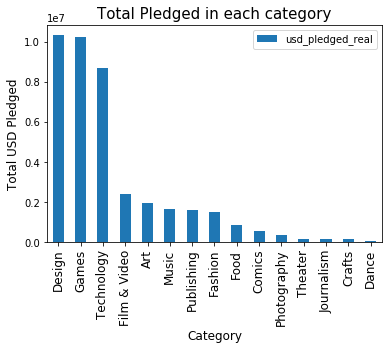

In [9]:
# Total pledged in each category

main_category.plot(y='usd_pledged_real', kind='bar')
plt.style.use('ggplot')
plt.setp(plt.gca().get_xticklabels(), rotation=90, fontsize=12) #, horizontalalignment='right'
plt.title('Total Pledged in each category', fontsize=15, fontname='DejaVu Sans')
plt.ylabel('Total USD Pledged', fontsize=12, fontname='DejaVu Sans')
plt.xlabel('Category', fontsize=12, fontname='DejaVu Sans')

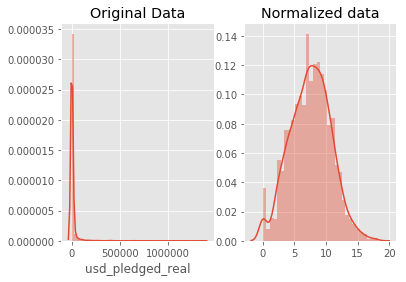

In [10]:
# get the index of all positive pledges (Box-Cox only takes postive values)
index_of_positive_pledges = file_opened.usd_pledged_real > 0

# get only positive pledges (using their indexes)
positive_pledges = file_opened.usd_pledged_real.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = scipy.stats.boxcox(positive_pledges)[0]

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")

In [11]:
# The projects split into funding success by percentages

percentual_sucess = (dataframe["state"].value_counts() / len(dataframe["state"]) * 100,2)

print("State Percentual in %: ")
print(percentual_sucess)

state = (dataframe["state"].value_counts() / len(dataframe["state"]) * 100,2)

State Percentual in %: 
(failed        51.359245
successful    36.171647
canceled      11.817569
suspended      0.629072
live           0.022467
Name: state, dtype: float64, 2)


[]

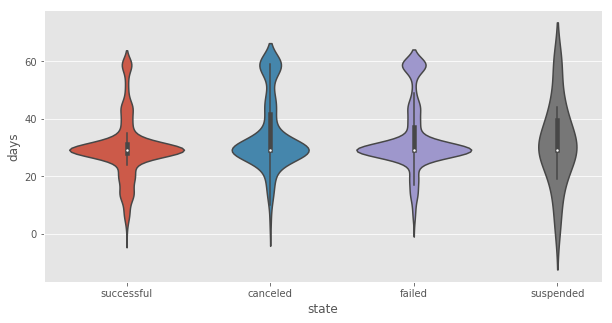

In [12]:
# The Days where the state occurred most commonly is the widest

df = df[df.state.str.contains("live") == False] # Removes live as it is junk in visualisation
plt.figure(figsize=(10,5))
sns.violinplot(x='state', y='days', data=df)
plt.plot()

# Computing the confidence interval

We define a function to compute the confidence interval at a given level. For the level parameter, 0.95 corresponds to a 95% confidence interval.

This will help us quantify reliability in our data


In [13]:
def mean_confidence_interval(data, confidence):
    a = 1.0 * np.array(data) # dataset
    n = len(a) # number of values in dataset
    m, se = np.mean(a), scipy.stats.sem(a) # m = mean, se = standard error/ margin of error
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [14]:
ci_usd_pledged_real = mean_confidence_interval(dataframe['usd_pledged_real'], 0.95)
print('Confidence Interval of USD Pledged per project.')
print('Mean: ' + str(ci_usd_pledged_real[0]))
print('Low boundary: ' + str(ci_usd_pledged_real[1]))
print('High boundary: ' + str(ci_usd_pledged_real[2]))

Confidence Interval of USD Pledged per project.
Mean: 9163.28195911
Low boundary: 7603.0076101
High boundary: 10723.5563081


In [15]:
ci_usd_goal_real = mean_confidence_interval(dataframe['usd_goal_real'], 0.95)
print('Confidence Interval of USD Goal per project.')
print('Mean: ' + str(ci_usd_goal_real[0]))
print('Low boundary: ' + str(ci_usd_goal_real[1]))
print('High boundary: ' + str(ci_usd_goal_real[2]))

Confidence Interval of USD Goal per project.
Mean: 56992.7146709
Low boundary: 8219.56119875
High boundary: 105765.868143


In [16]:
backers = mean_confidence_interval(dataframe['backers'], 0.95)
print('Confidence Interval of backers per project.')
print('Mean: ' + str(backers[0]))
print('Low boundary: ' + str(backers[1]))
print('High boundary: ' + str(backers[2]))

Confidence Interval of backers per project.
Mean: 116.70501011
Low boundary: 97.3774664095
High boundary: 136.032553811


# Modelling

Our research questions are:
- Q1. Do certain categories of projects have a higher success funding rate than others?
- Q2. Are backers a good indicator to predict the USD pledged? 
- Q3. Are we able to use the project's features to predict if the project reaches funding or not?

## Research question one:
    ## Do certain categories from various countries of projects have a higher success funding rate than others


In [17]:
# We are splitting the data into test and training
q1 = df.drop(['name', 'currency', 'launched','deadline'], axis = 1)
dummies = pd.get_dummies(data=q1, columns=['main_category', 'country'])

X_train_q1, X_test_q1, y_train_q1, y_test_q1 = train_test_split(dummies.drop('state',axis=1), dummies['state'], test_size=0.25, random_state=101)

##### Random Forest

In [18]:
q1_forest = RandomForestClassifier(n_estimators=50, n_jobs=-1)
q1_forest.fit(X_train_q1, y_train_q1)
forest_predictions_q1 = q1_forest.predict(X_test_q1)

##### Evaluation Model

In [19]:
print('Research Question 1 Evaluation: ')
print('Classification Report: ')
print(classification_report(y_test_q1, forest_predictions_q1))
print('\nConfusion Matrix: ')
print(confusion_matrix(y_test_q1, forest_predictions_q1))

Research Question 1 Evaluation: 
Classification Report: 
             precision    recall  f1-score   support

   canceled       0.26      0.09      0.13       121
     failed       0.82      0.89      0.86       577
 successful       0.90      0.98      0.94       410
  suspended       0.00      0.00      0.00         5

avg / total       0.79      0.83      0.80      1113


Confusion Matrix: 
[[ 11 100   9   1]
 [ 31 515  31   0]
 [  0   9 400   1]
 [  0   3   2   0]]


## Research question two:
    ## Are backers a good indicator to predict the USD pledged? 
    
### Hypothesis testing
- H0: There is a no correlation between backers and USD pledged.
- H1: There is a positive correlation between backers and USD pledged.


In [20]:
non_zero = df[df['usd_pledged_real'] != 0]
print(non_zero.shape)

# Encode state column to binary
# Define q2_X and q2_Y
q2_X = non_zero[non_zero['usd_pledged_real'] != 0]['backers'].values
q2_Y = non_zero[non_zero['usd_pledged_real'] != 0]['usd_pledged_real'].values

q2_X = q2_X.reshape(3691, 1)
q2_Y = q2_Y.reshape(3691, 1)

print(q2_X.shape)
print(q2_Y.shape)

(3691, 11)
(3691, 1)
(3691, 1)


##### Linear Regression

Linear Regression Model: 


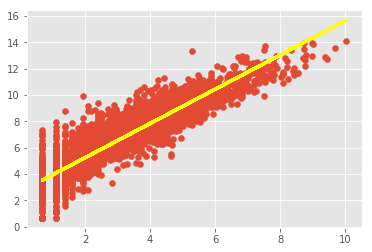

In [21]:
# Backers & pledged amount - Linear Regression. Use backers to predict usd_pledged_real
# Model fitting and visualization
# Input (X): backers (logarithm)
# Output (Y): usd_pledged_real (logarithm)

regr = linear_model.LinearRegression()
regr.fit(np.log(q2_X+1), np.log(q2_Y+1))

print('Linear Regression Model: ')
plt.scatter(np.log(q2_X+1), np.log(q2_Y+1))
plt.plot(np.log(q2_X+1), regr.predict(np.log(q2_X+1)), color='yellow', linewidth=3)
plt.show()

In [22]:
# Loss estimation: mean squared error
# Results: error and parameters
y_pred_q2 = regr.predict(np.log(q2_X+1))
y_true_q2 = np.log(q2_Y+1)

print("error = ", sklearn.metrics.mean_squared_error(y_true_q2, y_pred_q2))
print("coefficient = ", regr.coef_)
print("intercept = ", regr.intercept_)

('error = ', 1.1122161648355882)
('coefficient = ', array([[ 1.29730686]]))
('intercept = ', array([ 2.64669395]))


#### Encode state column to binary

- successful -> 1
- failed -> 0
- else -> delete

In [23]:
print (df['state'].value_counts())
print ('')
print ("df.shape = ", df.shape)

failed        2286
successful    1610
canceled       526
suspended       28
Name: state, dtype: int64

('df.shape = ', (4450, 11))


In [24]:
def state_change(cell_value):
    if cell_value == 'successful':
        return 1
    
    elif cell_value == 'failed':
        return 0
    
    else:
        return 'del'

In [25]:
q2 = df.copy()
q2['state'] = q2['state'].apply(state_change)
print (q2[q2['state'] == 1].shape)
print (q2[q2['state'] == 0].shape)
print (q2[q2['state'] == 'del'].shape)
print (q2[q2['state'] == 1].shape[0] + q2[q2['state'] == 0].shape[0])

(1610, 11)
(2286, 11)
(554, 11)
3896


#### Concatenate new DataFrame

-  main_category
-  time
-  state

In [26]:
q2 = df.drop(df[df['state'] == 'del'].index)
q2 = pd.concat([
                  q2['main_category'],
                  q2['days'],
                  q2['state']], axis = 1
                 )
print(q2[:2])

           main_category  days       state
ID                                        
1856478743    Journalism  35.0  successful
1879437630    Journalism  30.0  successful


Data Split:
- Train: 70%
- Test: 30%

In [27]:
# Model Two Datasets 
# Seems clean enough to get some dummies for categorical variables

train, test = sklearn.model_selection.train_test_split(q2, test_size = 0.1705, random_state = 42)
print("Train shape = ", train.shape, str(len(train)/float(len(q2)) * 100) + "%")
print("Test shape = ", test.shape, str(len(test)/float(len(q2)) * 100) + "%")

('Train shape = ', (3691, 3), '82.9438202247%')
('Test shape = ', (759, 3), '17.0561797753%')


In [28]:
# Define X and Y datas

# Data is split into test and training data
X_train_q2 = pd.concat(
    [
     pd.get_dummies(train['main_category'], prefix = 'main_category'),
     train["days"]
    ], axis=1)

X_test_q2 = pd.concat(
    [
     pd.get_dummies(test['main_category'], prefix = 'main_category'),
     test["days"]
    ], axis=1)

y_train_q2 = train['state']

y_test_q2 = test['state']

##### Random Forest

In [29]:
# Project state prediction - Random Forest

for_record = {
    'baseline':{},
}

start = time.time()
end = time.time()
sec = end - start
q2_forest = RandomForestClassifier(random_state = 42)
q2_forest.fit(X_train_q2, y_train_q2)
forest_predictions_q2 = q2_forest.predict(X_train_q2)

##### Evaluation Model

In [30]:
# print(classification_report(y_test, q2_forest))

for_record['baseline']['params'] = q2_forest.get_params()
for_record['baseline']['time'] = sec
for_record['baseline']["train_score"] = q2_forest.score(X_train_q2, y_train_q2)
for_record['baseline']['test_score'] = q2_forest.score(X_test_q2, y_test_q2)
# for_record['baseline']['f1'] = sklearn.metrics.f1_score(y_train_q2, y_pred_q2, average = 'weighted')

print('Research Question 2 Evaluation: ')
print('Report: ')
print(for_record)
print('\nConfusion Matrix: ')
print(confusion_matrix(y_train_q2, forest_predictions_q2))

Research Question 2 Evaluation: 
Report: 
{'baseline': {'test_score': 0.52964426877470361, 'train_score': 0.61609319967488485, 'params': {'warm_start': False, 'oob_score': False, 'n_jobs': 1, 'min_impurity_decrease': 0.0, 'verbose': 0, 'max_leaf_nodes': None, 'bootstrap': True, 'min_samples_leaf': 1, 'n_estimators': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'gini', 'random_state': 42, 'min_impurity_split': None, 'max_features': 'auto', 'max_depth': None, 'class_weight': None}, 'time': 4.9114227294921875e-05}}

Confusion Matrix: 
[[  53  318   62    1]
 [  16 1686  197    1]
 [  23  778  532    2]
 [   0   18    1    3]]


## Research Question three: 
     ## 3. Are we able to use the projectâ€™s features such as country or category to predict if the project reaches   funding or not.


In [31]:
# Preparing data
df2 = pd.read_csv('transformed_kickstarter_2017.csv', encoding='utf-8')

df2 = df2[(df2['state'] == 'failed') | (df2['state'] == 'successful')].copy()
print(df2.shape)

# Columns to remove
df2 = df2.drop('ID', 1)    
df2 = df2.drop('name', 1)
df2 = df2.drop('usd_pledged_real', 1)
df2 = df2.drop('backers', 1)
print(df2.shape)

(3896, 11)
(3896, 7)


In [32]:
# Create new columns
# 'duration_days' = 'deadline' - 'launched'

df2['launched'] = pd.to_datetime(df2['launched'])
df2['deadline'] = pd.to_datetime(df2['deadline'])

df2['days'] = df2['deadline'].subtract(df2['launched'])
df2['days'] = df2['days'].astype('timedelta64[D]')

# These columns are not needed now
df2 = df2.drop('launched', 1)
df2 = df2.drop('deadline', 1)

In [33]:
df2 = df2[(df2['usd_goal_real'] <= 100000) & (df2['usd_goal_real'] >= 1000)].copy()
print(df2.shape)
df2.head()

(3043, 6)


main_category currency       state country  usd_goal_real  days
0     Journalism      USD  successful      US           1250  35.0
6   Film & Video      USD  successful      US          10000  29.0
7     Publishing      USD      failed      US           2500  39.0
10    Publishing      AUD  successful      AU           7161  19.0
11       Fashion      USD      failed      US           7400  29.0

In [34]:
# Encoding column 'category'
df2 = pd.get_dummies(df2, columns = ['main_category'])
df2.rename(columns={"main_category_Film & Video": "main_category_Film"}, inplace=True)

# Encoding column 'currency'
df2 = pd.get_dummies(df2, columns = ['currency'])

# Encoding column 'country'
df2 = pd.get_dummies(df2, columns=['country'])

print(df2.columns)
print(df2.shape)


Index([                    u'state',             u'usd_goal_real',
                            u'days',         u'main_category_Art',
            u'main_category_Comics',      u'main_category_Crafts',
             u'main_category_Dance',      u'main_category_Design',
           u'main_category_Fashion',        u'main_category_Film',
              u'main_category_Food',       u'main_category_Games',
        u'main_category_Journalism',       u'main_category_Music',
       u'main_category_Photography',  u'main_category_Publishing',
        u'main_category_Technology',     u'main_category_Theater',
                    u'currency_AUD',              u'currency_CAD',
                    u'currency_CHF',              u'currency_DKK',
                    u'currency_EUR',              u'currency_GBP',
                    u'currency_HKD',              u'currency_MXN',
                    u'currency_NOK',              u'currency_NZD',
                    u'currency_SEK',              u'currency_S

In [35]:
q3 = pd.read_csv('transformed_kickstarter_2017.csv', encoding='utf-8')

# We use only 'name' & 'state'
q3 = q3.drop(['main_category', 'currency', 'deadline', 
              'launched','backers', 'country', 'usd_pledged_real', 'usd_goal_real', 'ID'], 1)

q3 = q3[(q3['state'] == 'failed') | (q3['state'] == 'successful')].copy()

# Encoding column 'state'
# failed = 0, successful = 1
q3['state'] = q3['state'].map({
        'failed': 0,
        'successful': 1         
})

print(q3.shape)

(3896, 2)


In [36]:
# column 'state' to int
# q3['state'] = q3['state'].astype(int)

# split each "name"
q3['name'] = q3['name'].str.split()
q3.head()

name  state
0  [Podcast, "El, Valle, de, los, Tercos":, Latin...      1
1                               [Resolute, Magazine]      1
2  [Pussycats:, Sex,, Drugs,, &, The, Impossible,...      1
4  ["As, Long, As, I, Have, Breath", -, A, Worshi...      1
5  [Everette, Hartsoe's, HELL, RIOT, #0-ZOMBIE, H...      1

In [37]:
# clean each name. We need 'name' without punctuation

q3['name'] = q3['name'].apply(lambda x:' '.join([i for i in x if i not in string.punctuation]))

# all words have small letters

q3['name'] = q3['name'].str.lower()
# q3['name'] = q3['name'].index.str.encode('utf-8')
# Filter out Stop Words
# Import stopwords with nltk.

from nltk.corpus import stopwords
stop = stopwords.words('english')

q3['name'] = q3['name'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [38]:
q3['name'] = q3['name'].str.split()
q3.head()

name  state
0  [podcast, "el, valle, de, los, tercos":, latin...      1
1                               [resolute, magazine]      1
2         [pussycats:, sex,, drugs,, impossible, #2]      1
4              ["as, long, breath", worship, single]      1
5  [everette, hartsoe's, hell, riot, #0-zombie, h...      1

In [39]:
# Stem Words
# Stemming refers to the process of reducing each word to its root or base.

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

q3['name'] = q3['name'].apply(lambda x: [stemmer.stem(y) for y in x])

q3.head()

name  state
0  [podcast, "el, vall, de, los, tercos":, latino...      1
1                                 [resolut, magazin]      1
2             [pussycats:, sex,, drugs,, imposs, #2]      1
4               ["as, long, breath", worship, singl]      1
5  [everett, hartso, hell, riot, #0-zombi, hunter...      1

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

bag_of_words = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False).fit_transform(q3['name'])

In [41]:
# Preparing for modelling

df2['state'] = df2['state'].map({
        'failed': 0,
        'successful': 1         
})

print(df2.shape)
df2.head()

q3_y = df2['state']

print(q3_y.shape)
q3_y.head(5)

df2 = df2.drop('state', 1)

(3043, 52)
(3043,)


In [42]:
# Split dataframe into random train and test subsets

X_train_q3, X_test_q3, y_train_q3, y_test_q3 = train_test_split(
    df2,
    q3_y, 
    test_size = 0.1,
    random_state=42
)

print(X_train_q3.shape, y_train_q3.shape)
print(X_test_q3.shape, y_test_q3.shape)

((2738, 51), (2738,))
((305, 51), (305,))


##### Each feature and its correlation

In [43]:
logreg = LogisticRegression()
logreg.fit(X_train_q3, y_train_q3)

coeff_df2 = pd.DataFrame(df2.columns.delete(0))
coeff_df2.columns = ['Feature']
coeff_df2["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df2.sort_values(by='Correlation', ascending=False)

# Look into country_AT correlation because it is highest correlation of data
print('Austrian (AT) projects have the highest correlation in the data.')
print(coeff_df2)

Austrian (AT) projects have the highest correlation in the data.
                      Feature  Correlation
0                        days    -0.000021
1           main_category_Art    -0.013451
2        main_category_Comics    -0.013766
3        main_category_Crafts     0.023958
4         main_category_Dance    -0.026807
5        main_category_Design    -0.000879
6       main_category_Fashion     0.037296
7          main_category_Film    -0.016712
8          main_category_Food     0.009078
9         main_category_Games    -0.029517
10   main_category_Journalism     0.053672
11        main_category_Music    -0.004228
12  main_category_Photography     0.031771
13   main_category_Publishing     0.001467
14   main_category_Technology    -0.025736
15      main_category_Theater    -0.032953
16               currency_AUD     0.014429
17               currency_CAD    -0.002444
18               currency_CHF    -0.014682
19               currency_DKK     0.001061
20               currency_EUR   

##### Logistic Regression

In [50]:
logreg = LogisticRegression()
logreg.fit(X_train_q3, y_train_q3)
y_predict_q3_logreg = logreg.predict(X_test_q3)

accuracy_score_logreg = accuracy_score(y_test_q3, y_predict_q3_logreg, normalize=True)
recall_logreg = recall_score(y_test_q3, y_predict_q3_logreg, average='weighted')
precision_logreg = precision_score(y_test_q3, y_predict_q3_logreg, average='macro')
f1_score_logreg = f1_score(y_test_q3, y_predict_q3_logreg, average='macro')  
mcnemar_test_logreg = mcnemar(y_test_q3, y_predict_q3_logreg)[1]

print('Is logreg better than baseline?',
     'Yes (p={})'.format(mcnemar_test_logreg) if mcnemar_test_logreg < 0.05 else 'No')
print('Accuracy score: {0:0.4f}'.format(accuracy_score_logreg))
print('Recall score: {0:0.4f}'.format(recall_logreg))
print('Precision score: {0:0.4f}'.format(precision_logreg))
print('F1 score: {0:0.4f}'.format(f1_score_logreg))

('Is logreg better than baseline?', 'Yes (p=9.79907384198e-26)')
Accuracy score: 0.6328
Recall score: 0.6328
Precision score: 0.8158
F1 score: 0.3959


##### KNN

In [51]:
knn = KNeighborsClassifier()
knn.fit(X_train_q3, y_train_q3)
y_predict_q3_knn = knn.predict(X_test_q3)

accuracy_score_knn = accuracy_score(y_test_q3, y_predict_q3_knn, normalize=True)
recall_knn = recall_score(y_test_q3, y_predict_q3_knn, average='weighted')
precision_knn = precision_score(y_test_q3, y_predict_q3_knn, average='macro')
f1_score_knn = f1_score(y_test_q3, y_predict_q3_knn, average='macro')  
mcnemar_test_knn = mcnemar(y_test_q3, y_predict_q3_knn)[1]

print('Is KNN better than baseline?',
     'Yes (p={})'.format(mcnemar_test_knn) if mcnemar_test_knn < 0.05 else 'No')
print('Accuracy score: {0:0.4f}'.format(accuracy_score_knn))
print('Recall score: {0:0.4f}'.format(recall_knn))
print('Precision score: {0:0.4f}'.format(precision_knn))
print('F1 score: {0:0.4f}'.format(f1_score_knn))

('Is KNN better than baseline?', 'Yes (p=0.000311490976767)')
Accuracy score: 0.6033
Recall score: 0.6033
Precision score: 0.5484
F1 score: 0.5306


##### Linear SVC

In [46]:
linear_svc = LinearSVC()
linear_svc.fit(X_train_q3, y_train_q3)
y_predict_q3_svc = linear_svc.predict(X_test_q3)

accuracy_score_svc = accuracy_score(y_test_q3, y_predict_q3_svc, normalize=True)
recall_linear_svc = recall_score(y_test_q3, y_predict_q3_svc, average='weighted')
precision_linear_svc = precision_score(y_test_q3, y_predict_q3_svc, average='macro')
f1_score_linear_svc = f1_score(y_test_q3, y_predict_q3_svc, average='macro')  
mcnemar_test_linear_svc = mcnemar(y_test_q3, y_predict_q3_svc)[1]

print('Is linear svc better than baseline?',
     'Yes (p={})'.format(mcnemar_test_linear_svc) if mcnemar_test_linear_svc < 0.05 else 'No')
print('Accuracy score: {0:0.4f}'.format(accuracy_score_svc))
print('Recall score: {0:0.4f}'.format(recall_linear_svc))
print('Precision score: {0:0.4f}'.format(precision_linear_svc))
print('F1 score: {0:0.4f}'.format(f1_score_linear_svc))

('Is linear svc better than baseline?', 'Yes (p=3.55296422416e-33)')
Accuracy score: 0.3607
Recall score: 0.3607
Precision score: 0.3947
F1 score: 0.2997


##### Decision Tree

In [47]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_q3, y_train_q3)
y_predict_q3_decision_tree = decision_tree.predict(X_test_q3)

accuracy_score_decision_tree = accuracy_score(y_test_q3, y_predict_q3_decision_tree, normalize=True)
recall_decision_tree = recall_score(y_test_q3, y_predict_q3_decision_tree, average='weighted')
precision_decision_tree = precision_score(y_test_q3, y_predict_q3_decision_tree, average='macro')
f1_score_decision_tree = f1_score(y_test_q3, y_predict_q3_decision_tree, average='macro')  
mcnemar_test_decision_tree = mcnemar(y_test_q3, y_predict_q3_decision_tree)[1]

print('Is decision tree better than baseline?',
     'Yes (p={})'.format(mcnemar_test_decision_tree) if mcnemar_test_decision_tree < 0.05 else 'No')

print('Accuracy score: {0:0.4f}'.format(accuracy_score_decision_tree))
print('Recall score: {0:0.4f}'.format(recall_decision_tree))
print('Precision score: {0:0.4f}'.format(precision_decision_tree))
print('F1 score: {0:0.4f}'.format(f1_score_decision_tree))

('Is decision tree better than baseline?', 'Yes (p=0.0455002638964)')
Accuracy score: 0.5869
Recall score: 0.5869
Precision score: 0.5399
F1 score: 0.5337


##### Random Forest

In [53]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_q3, y_train_q3)
y_predict_q3_random_forest = random_forest.predict(X_test_q3)

accuracy_score_random_forest = accuracy_score(y_test_q3, y_predict_q3_random_forest, normalize=True)
recall_random_forest = recall_score(y_test_q3, y_predict_q3_random_forest, average='weighted')
precision_random_forest = precision_score(y_test_q3, y_predict_q3_random_forest, average='macro')
f1_score_random_forest = f1_score(y_test_q3, y_predict_q3_random_forest, average='macro')  
mcnemar_test_random_forest = mcnemar(y_test_q3, y_predict_q3_random_forest)[1]

print('Is random forest better than baseline?',
     'Yes (p={})'.format(mcnemar_test_random_forest) if mcnemar_test_random_forest < 0.05 else 'No')

print('Accuracy score: {0:0.4f}'.format(accuracy_score_random_forest))
print('Recall score: {0:0.4f}'.format(recall_random_forest))
print('Precision score: {0:0.4f}'.format(precision_random_forest))
print('F1 score: {0:0.4f}'.format(f1_score_random_forest))

('Is random forest better than baseline?', 'Yes (p=0.001565402258)')
Accuracy score: 0.6328
Recall score: 0.6328
Precision score: 0.5910
F1 score: 0.5719


# Evaluation Models Q3

In [52]:
# %precision 20
# u'%.2f'
# np.set_printoptions(precision=3)
print('Research Question 3 Evaluation: ')
evaluation_models_q3 = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest',   
              'Linear SVC', 
              'Decision Tree'],
    'Recall': [recall_knn, recall_logreg, 
              recall_random_forest,   
              recall_linear_svc, recall_decision_tree],
    
    'Precision': [precision_knn, precision_logreg, 
              precision_random_forest,   
              precision_linear_svc, precision_decision_tree],
    
    'F1 Score': [f1_score_knn, f1_score_logreg, 
              f1_score_random_forest,   
              f1_score_linear_svc, f1_score_decision_tree],
    
    'Mean Accuracy Score': [accuracy_score_knn, accuracy_score_logreg, 
                       accuracy_score_random_forest, accuracy_score_svc, 
                       accuracy_score_decision_tree],
    'Hypothesis testing vs Baseline': [mcnemar_test_knn, mcnemar_test_logreg, 
                       mcnemar_test_random_forest, mcnemar_test_linear_svc, 
                       mcnemar_test_decision_tree]
})
evaluation_models_q3.sort_values(by='F1 Score', ascending=False)

Research Question 3 Evaluation: 


F1 Score  Hypothesis testing vs Baseline  Mean Accuracy Score  \
2  0.579020                    8.150972e-03             0.632787   
4  0.533707                    4.550026e-02             0.586885   
0  0.530620                    3.114910e-04             0.603279   
1  0.395869                    9.799074e-26             0.632787   
3  0.299676                    3.552964e-33             0.360656   

                 Model  Precision    Recall  
2        Random Forest   0.593102  0.632787  
4        Decision Tree   0.539872  0.586885  
0                  KNN   0.548402  0.603279  
1  Logistic Regression   0.815789  0.632787  
3           Linear SVC   0.394696  0.360656